In [25]:
import cv2
import numpy as np
import json
import os

# Load JSON data from the file
with open(r'.\data\NDD20\BELOW_LABELS.json', 'r') as json_file:
    json_data = json.load(json_file)

# Process each image in the JSON data
for image_name, image_data in json_data.items():
    if "regions" in image_data:
        dolphin_regions = [region for region in image_data["regions"] if region["region_attributes"]["object"] == "dolphin"]

        # Load the image corresponding to the JSON entry
        image_filename = os.path.splitext(image_data["filename"])[0]

        image = cv2.imread(os.path.join(r".\data\NDD20\BELOW", image_filename + '.jpg'))  # Assuming image_name contains the path to the image

        if dolphin_regions:
            # Initialize a mask with zeros
            mask = np.zeros(image.shape[:2], dtype=np.uint8)

            # Iterate through the polygon points and fill the mask with unique values for each region
            for idx, region in enumerate(dolphin_regions):
                points_x = region['shape_attributes']['all_points_x']
                points_y = region['shape_attributes']['all_points_y']
                points = [(x, y) for x, y in zip(points_x, points_y)]

                #(n, 2)
                points = np.array(points, np.int32)

                #(n, 1, 2)
                points = points.reshape((-1, 1, 2))

                # Assign a unique value (e.g., idx + 1) to each region
                mask = cv2.fillPoly(mask, [points], idx + 1)

            # Save the mask to a file or use it as needed
            output_file = os.path.join(r".\data\NDD20\BELOW_MASKS", image_filename + '_mask.png')
            cv2.imwrite(output_file, mask)

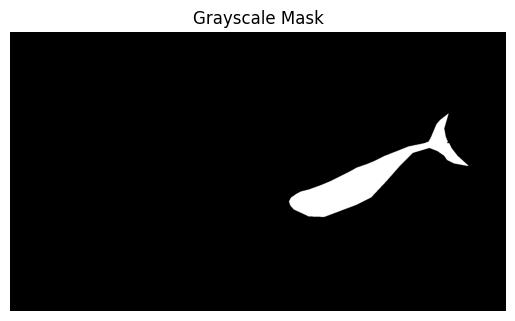

In [29]:
import matplotlib.pyplot as plt
mask = cv2.imread(R".\data\NDD20\BELOW_MASKS\2_mask.png", cv2.IMREAD_GRAYSCALE)
if mask is not None:
    # Display the grayscale mask using Matplotlib
    plt.imshow(mask, cmap='gray')
    plt.title('Grayscale Mask')
    plt.axis('off')  # Hide the axis
    plt.show()
else:
    print("Failed to load the mask image.")

In [28]:
unique_pixel_values = np.unique(mask)
unique_pixel_values

array([0, 1], dtype=uint8)